In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Data load and Adding CR data

In [2]:
data=pd.read_excel("C:/Users/SEC/Desktop/Hard1.xlsx")

In [3]:
data=pd.read_excel("C:/Users/SEC/Desktop/Hard1.xlsx",header=0,names=['글자세트', '그림세트', '자극세트','연관유무','응답','반응시간'])

In [4]:
data

,글자세트,그림세트,자극세트,연관유무,응답,반응시간
0,13,37,1,U,q,0.630571
1,36,7,0,U,r,47.221504
2,14,14,0,R,r,0.895417
3,4,4,1,R,r,0.511395
4,1,1,0,R,r,0.699193
...,...,...,...,...,...,...
3835,26,4,0,U,q,1.428068
3836,30,33,1,U,q,1.684731
3837,14,12,1,U,q,2.765056
3838,20,20,1,R,r,0.640602


In [5]:
data.shape

(3840, 6)

In [6]:
data.describe()

,글자세트,그림세트,자극세트,반응시간
count,3840.0000,3840.0000,3840.000000,3840.000000
mean,20.5000,20.5000,0.500000,0.817836
std,11.5449,11.5449,0.500065,1.076897
min,1.0000,1.0000,0.000000,0.040146
25%,10.7500,10.7500,0.000000,0.461054
50%,20.5000,20.5000,0.500000,0.594002
75%,30.2500,30.2500,1.000000,0.826665
max,40.0000,40.0000,1.000000,47.221504


In [7]:
data['cr']=data['자극세트']

data.loc[(data['연관유무']=='U')&(data['응답']=='q'),"cr"]=1
data.loc[(data["연관유무"] == "U") & (data["응답"] == "r"), "cr"] = 0
data.loc[(data["연관유무"] == "R") & (data["응답"] == "r"), "cr"] = 1
data.loc[(data["연관유무"] == "R") & (data["응답"] == "q"), "cr"] = 0

In [8]:
data.shape

(3840, 7)

In [9]:
data['cr'].unique()

array([1, 0], dtype=int64)

Data preprocessing

{'whiskers': [<matplotlib.lines.Line2D at 0x26a422db488>,
 'caps': [<matplotlib.lines.Line2D at 0x26a422da688>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a40659348>],
 'medians': [<matplotlib.lines.Line2D at 0x26a422ceb08>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a4225b3c8>],
 'means': []}

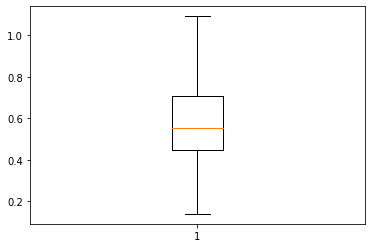

In [10]:
set0=data[data['자극세트']==0]
set0_RT=set0[(set0['반응시간']<1.096)&(set0['반응시간']>0.0402)]
plt.boxplot(set0_RT['반응시간'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26a4228dd08>,
 'caps': [<matplotlib.lines.Line2D at 0x26a4228d9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a422612c8>],
 'medians': [<matplotlib.lines.Line2D at 0x26a4220c688>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a4220c708>],
 'means': []}

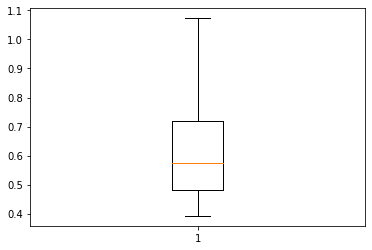

In [11]:
set1 = data[data['자극세트'] == 1]
set1_RT = set1[(set1["반응시간"] < 1.076)&(set1["반응시간"] > 0.392)]
plt.boxplot(set1_RT['반응시간'])

Creating mean vector list

In [12]:
mean_set0=[]
cr_set0=[]

for n in range(1,25):
    ddd = set0[80*(n-1):80*n]
    ddd1 = ddd[(ddd['반응시간'] < 1.096) & (ddd['반응시간'] > 0.0402)]
    mean = ddd1['반응시간'].mean()
    mean_set0.append(mean)
    cr = ddd1['cr'].sum()
    cr1 = cr/len(ddd1['반응시간'])
    cr_set0.append(cr1)

In [13]:
mean_set0

[0.6688407644067842,
 0.6636833171864964,
 0.705712554386082,
 0.583099646478677,
 0.47961268860755024,
 0.4473845262501072,
 0.6434180473685014,
 0.5937835030303121,
 0.5234324338025672,
 0.6542473500000685,
 0.5487422041102809,
 0.6349103196973208,
 0.5264560904109963,
 0.5258815064102534,
 0.6429930075471689,
 0.6559792098039273,
 0.5051909075001049,
 0.5752098430554421,
 0.6379943821918198,
 0.4445430000000301,
 0.6962275980768027,
 0.659755763158644,
 0.6064279239997268,
 0.6790903957394705]

In [14]:
mean_set1=[]
cr_set1=[]

for n in range(1,25):
    ddd = set1[80*(n-1):80*n]
    ddd1 = ddd[(ddd['반응시간'] < 1.076) & (ddd['반응시간'] > 0.392)]
    mean = ddd1['반응시간'].mean()
    mean_set1.append(mean)
    cr = ddd1['cr'].sum()
    cr1 = cr/len(ddd1['반응시간'])
    cr_set1.append(cr1)

In [15]:
cr_set1

[0.9047619047619048,
 0.9107142857142857,
 0.9272727272727272,
 0.9253731343283582,
 0.8979591836734694,
 0.86,
 0.9230769230769231,
 0.8805970149253731,
 0.8909090909090909,
 0.9166666666666666,
 0.847457627118644,
 0.9333333333333333,
 0.8478260869565217,
 0.9310344827586207,
 0.9148936170212766,
 0.9821428571428571,
 0.9838709677419355,
 0.9873417721518988,
 0.927536231884058,
 0.8431372549019608,
 0.9384615384615385,
 0.9487179487179487,
 0.9393939393939394,
 0.9807692307692307]

Statistical Testing 

그래프 모양으로 정규성 판단

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([0.51103285, 0.52433825, 0.53076988, 0.53293141, 0.55225819,
         0.55663816, 0.56766614, 0.58883849, 0.59027767, 0.5989052 ,
         0.60979127, 0.61347895, 0.61742055, 0.62523376, 0.6347025 ,
         0.63890982, 0.64170512, 0.64353377, 0.64806802, 0.66579428,
         0.67359186, 0.7062265 , 0.71455134, 0.71885075])),
 (0.06210355464518374, 0.6127297801153986, 0.990025721776002))

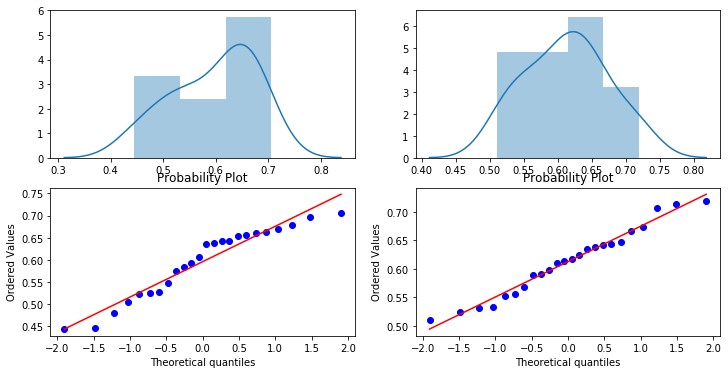

In [16]:
from scipy.stats import probplot

f, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.distplot(mean_set0, hist=True, ax=axes[0][0])
probplot(mean_set0, plot=axes[1][0]) #scipy.stats.probplot

sns.distplot(mean_set1, hist=True, ax=axes[0][1])
probplot(mean_set1, plot=axes[1][1]) #scipy.stats.probplot

그림으로 판단한결과 set0은 정규성 따르지 않고 set1은 정규성따름

통계로 정규성 판단(사피로 테스트(?))

In [17]:
import scipy
print(scipy.stats.shapiro(mean_set0))
print(scipy.stats.shapiro(mean_set1))

(0.9254697561264038, 0.07724202424287796)
(0.9669451713562012, 0.5924633741378784)


set0,set1 모두 정규성을 따름

paired t-test

In [18]:
scipy.stats.ttest_rel(mean_set0, mean_set1, axis=0, nan_policy='propagate')

Ttest_relResult(statistic=-2.3177130314328895, pvalue=0.029713779306868558)

0.05보다 pvalue값이 작아 귀무가설을 기각하므로 두 set간의 반응시간 차이가 의미가 있음을 알 수 있다.

In [19]:
import numpy as np
print('글 - 그림 세트의 평균 반응속도: ', np.array(mean_set0).mean())
print('그림 - 글 세트의 평균 반응속도: ', np.array(mean_set1).mean())

글 - 그림 세트의 평균 반응속도:  0.5959423743007973
그림 - 글 세트의 평균 반응속도:  0.6127297801153987


통계로 정규성 판단(사피로 테스트(?))

In [20]:
import scipy
print(scipy.stats.shapiro(cr_set0))
print(scipy.stats.shapiro(cr_set1))

(0.8761765956878662, 0.006967121735215187)
(0.943873941898346, 0.1988856941461563)


set0은 정규성을 따르지않고, set1은 정규성을 따름

In [21]:
scipy.stats.wilcoxon(cr_set0, cr_set1, zero_method='wilcox', correction=False, alternative='two-sided')

WilcoxonResult(statistic=146.0, pvalue=0.9090113066460508)

0.05보다 pvalue값이 크므로 귀무가설을 채택하여 두 set의 정답률 차이가 의미가 없고 우연임을 알 수 있다.

In [22]:
import numpy as np
print('글 - 그림 세트의 평균 정답률: ', np.array(cr_set0).mean())
print('그림 - 글 세트의 평균 정답률: ', np.array(cr_set1).mean())

글 - 그림 세트의 평균 정답률:  0.9154973614477976
그림 - 글 세트의 평균 정답률:  0.9184686591534401
